In [1]:
import re
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt

In [2]:
#Dataset has no cloum names so i added them

df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                      encoding = 'latin-1',
                      names = ["sentiment", "ids", "date", "flag", "user", "text"])

In [3]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(["ids", "date", "flag", "user"], axis=1)

In [5]:
decode_sent = {0:"Negative", 2: "Neutral", 4:"Positive"}
def decoder(label):
  return decode_sent[label]

In [6]:
df.sentiment = df.sentiment.apply(lambda x: decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [7]:
#There is no null data
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [8]:
#Make lower case
df["text"] = df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,Negative,is upset that he can't update his facebook by ...
2,Negative,@kenichan i dived many times for the ball. man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [10]:
#delete URLs
df["text"] = df['text'].str.replace('((www\.[^\s])+|(https?://[^\s]+))',"")

In [11]:
df.head()

,sentiment,text
0,Negative,"@switchfoot - awww, that's a bummer. you shou..."
1,Negative,is upset that he can't update his facebook by ...
2,Negative,@kenichan i dived many times for the ball. man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [12]:
#deleting user nicknames which has '@'
df['text'] = df['text'].str.replace(r'@[A-Za-z0-9_]+', "") 
df.head()

,sentiment,text
0,Negative,"- awww, that's a bummer. you shoulda got dav..."
1,Negative,is upset that he can't update his facebook by ...
2,Negative,i dived many times for the ball. managed to s...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."


In [13]:
#deleting symbols
df['text'] = df['text'].str.replace("[^\w\s]", "") 
df.head()

,sentiment,text
0,Negative,awww thats a bummer you shoulda got david c...
1,Negative,is upset that he cant update his facebook by t...
2,Negative,i dived many times for the ball managed to sa...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,no its not behaving at all im mad why am i he...


In [14]:
df['text'] = df['text'].str.replace("[\d]", "") 
df.head()

,sentiment,text
0,Negative,awww thats a bummer you shoulda got david c...
1,Negative,is upset that he cant update his facebook by t...
2,Negative,i dived many times for the ball managed to sa...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,no its not behaving at all im mad why am i he...


In [15]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /Users/yavuz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Delete most using words
sw.append("im")
sw.append("u")
df["text"]= df["text"].apply(lambda x : " ".join(x for x in x.split() if x not in sw))
df.head()

,sentiment,text
0,Negative,awww thats bummer shoulda got david carr third...
1,Negative,upset cant update facebook texting might cry r...
2,Negative,dived many times ball managed save rest go bounds
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad cant see


In [17]:
pd.Series(" ".join(df["text"]).split()).value_counts()

good                  89417
day                   84805
get                   81600
like                  77781
go                    72977
                      ...  
dshow                     1
beatleeven                1
shiiiiizzle               1
myspacecomladyenvy        1
bombwar                   1
Length: 429431, dtype: int64

In [18]:
delete = pd.Series(" ".join(df["text"]).split()).value_counts()
df.head()

,sentiment,text
0,Negative,awww thats bummer shoulda got david carr third...
1,Negative,upset cant update facebook texting might cry r...
2,Negative,dived many times ball managed save rest go bounds
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad cant see


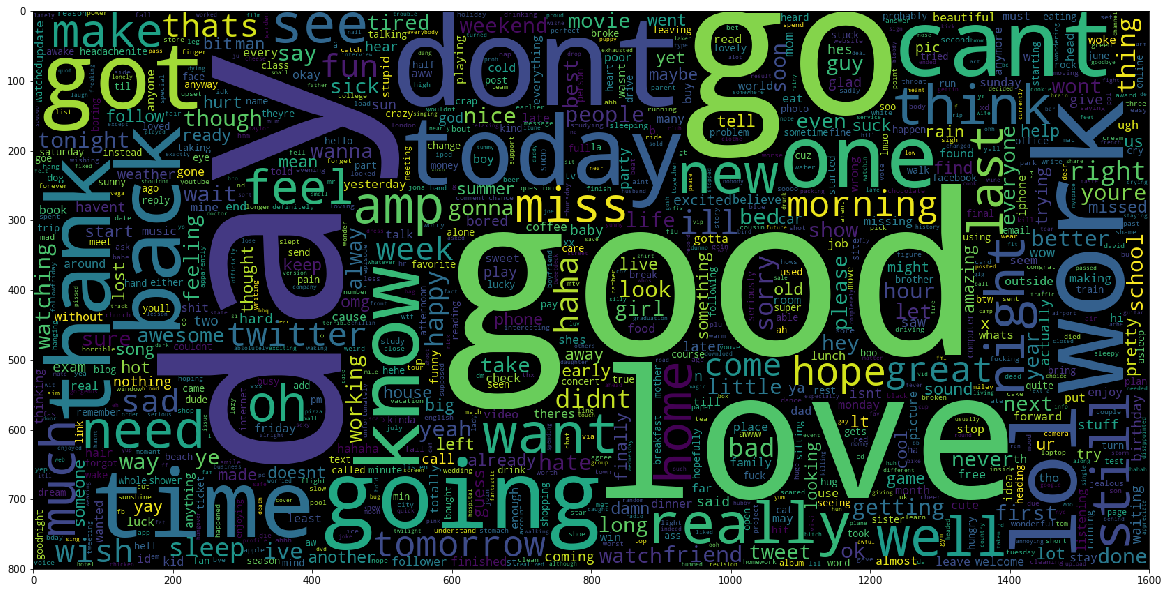

In [19]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df["text"]))
plt.imshow(wc)

In [20]:
df.groupby('sentiment').count()

,text
sentiment,
Negative,800000
Positive,800000


[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

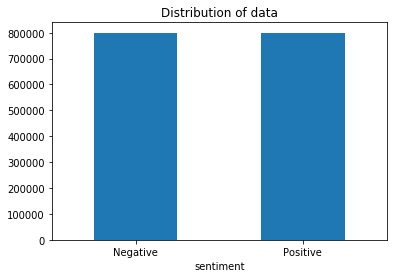

In [21]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(["Negative","Positive","Neutral"], rotation=0)

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/yavuz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
import textblob
from textblob import TextBlob

In [24]:
#Tokenize texts
TextBlob(df["text"][0]).words

WordList(['awww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day'])

In [25]:
from textblob import Word
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /Users/yavuz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
new_df = df.copy()

In [27]:
from nltk import PorterStemmer
from textblob import Word
new_df["text"] = new_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
new_df.head()

,sentiment,text
0,Negative,awww thats bummer shoulda got david carr third...
1,Negative,upset cant update facebook texting might cry r...
2,Negative,dived many time ball managed save rest go bound
3,Negative,whole body feel itchy like fire
4,Negative,behaving mad cant see


In [28]:
#Split Dataset for Train And Test

In [29]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["sentiment"], 
                                                                    random_state = 1)

In [30]:
train_x[0:5]

1389240              days guys make noooooise
635813                              wanted th
176401         miss dont say quotdamnquot lol
1282368                    hey thanks mention
541863     mk nonturbo ever get another turbo
Name: text, dtype: object

In [31]:
##tf = (df["text"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [32]:
train_y[0:5]

1389240    Positive
635813     Negative
176401     Negative
1282368    Positive
541863     Negative
Name: sentiment, dtype: object

In [33]:
test_y[0:5]

514293    Negative
142282    Negative
403727    Negative
649503    Negative
610789    Negative
Name: sentiment, dtype: object

In [34]:
##Count Vectorize

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [ ]:
vectorizer.get_feature_names()[0:5]

In [ ]:
x_train_count.toarray()